# 머신러닝 프레임워크 : scikit-learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터딩, 차원축소법이 가능하면 샘플데이터로 제공

In [8]:
# XOR 연산 학습해보기
xor_input = [
  [0,0,0],
  [0,1,1],
  [1,0,1],
  [1,1,0],

]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [9]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
# 문제
xor_data = xor_df.iloc[:,0:2] # Feature Columns
# 정답
xor_label = xor_df.iloc[:,2] # Target Column


In [10]:
# 데이터 학습과 예측하기
# 정확도 구할때 metrics 씀
from sklearn import svm, metrics

clf = svm.SVC()
# 지도학습
clf.fit(xor_data, xor_label)
# 예측하기
pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [11]:
# 정답률 구하기
ac_score = metrics.accuracy_score(xor_label, pred)
print("정답률 : ", ac_score)

정답률 :  1.0


In [12]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
clf.score(xor_data, xor_label)

1.0

In [13]:
# 품종 분류
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# 기본 통계량 확인하기
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# NaN 확인하기
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [16]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
# 품종을 컬러값으로 구분하기 위한 작업
color_tmp = []

for name in iris["Name"]:
  if name == "Iris-setosa":
    color_tmp.append('red')
  elif name == "Iris-virginica":
    color_tmp.append('blue')
  else:
    color_tmp.append('green')

iris['Color'] = color_tmp
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [18]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')

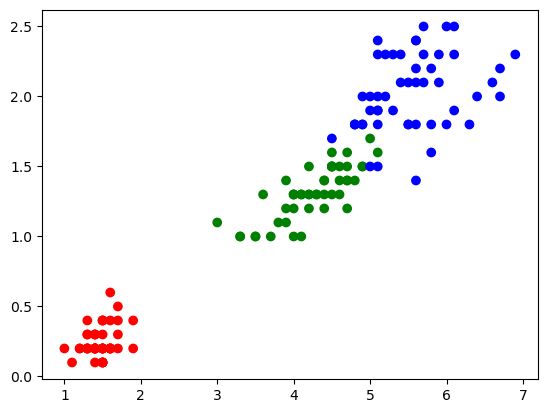

In [19]:
# Scatter 그려보기

plt.scatter(
    iris['PetalLength'],
    iris['PetalWidth'],
    c = iris['Color'],
)

# iris.plot(
#     kind = 'scatter',
#     x = 'PetalLength',
#     y = 'PetalWidth',
#     c = iris['Color'],
#     s = 18,     # dot size
#     figsize=(10, 5),
# )
plt.show()

In [20]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris['Name']
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [21]:
# 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label)
print(train_data.head())
print(test_data.head())
print("-"*10)
print(train_label.head())
print(test_label.head())


     SepalLength  SepalWidth  PetalLength  PetalWidth
116          6.5         3.0          5.5         1.8
4            5.0         3.6          1.4         0.2
102          7.1         3.0          5.9         2.1
74           6.4         2.9          4.3         1.3
91           6.1         3.0          4.6         1.4
     SepalLength  SepalWidth  PetalLength  PetalWidth
124          6.7         3.3          5.7         2.1
27           5.2         3.5          1.5         0.2
61           5.9         3.0          4.2         1.5
28           5.2         3.4          1.4         0.2
92           5.8         2.6          4.0         1.2
----------
116     Iris-virginica
4          Iris-setosa
102     Iris-virginica
74     Iris-versicolor
91     Iris-versicolor
Name: Name, dtype: object
124     Iris-virginica
27         Iris-setosa
61     Iris-versicolor
28         Iris-setosa
92     Iris-versicolor
Name: Name, dtype: object


In [22]:
# 학습 시키기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [23]:
# 예측하기
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor']


In [24]:
# 정답률
ac_score = metrics.accuracy_score(test_label, pred)
print("정답률 : ", ac_score)

정답률 :  1.0


In [25]:
# Training 정답률 
clf.score(train_data, train_label)

0.9642857142857143

In [26]:
# Test 정답률
clf.score(test_data, test_label)

1.0

In [27]:
# 분류 Report() : Confusion matrix
cl_report = metrics.classification_report(test_label, pred)
print(cl_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [28]:
print('accuracy : ', metrics.accuracy_score(test_label, pred))
# print('precision : ', metrics.precision_score(test_label, pred))
# print('recall : ', metrics.recall_score(test_label, pred))
# print('f1 : ', metrics.f1_score(test_label, pred))

accuracy :  1.0


In [29]:
# 예측해보기
[4.1, 3.5, 1.4, 0.2]

clf.predict([[4.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)

---
# 분류 Report 이해하기

번호 : [1,   2,   3,   4,    5,   6]
정답 : [음치, 음치, 음치, 음치, 정상, 정상]
예측 : [음치, 음치, 정상, 정상, 정상, 정상]

정확도 : 예측이 맞은 비율 ? 
      1,2,5,6 은 맞추고 3,4 번은 틀렸다. 6명중에서 4명을 맞췄으므로 4/6 = 2/3 = 0.66

정밀도 : 음치라고 예측한 사람들 중에 진짜 음치가 얼마나 있는가 ?
      내가 음치라고 예측한 1,2 번이 둘다 음치가 맞았다. 2/2 = 1.0

재현율 : 전체 음치중에 내가 맞춘 음치의 비율은?
        원래 음치가 4명 있는데 나는 그중에서 2명을 맞췄다. 2/4 = 0.5

F1 Score : 정밀도와 재현율의 평균
            2 * 정밀도 * 재현율 / (정밀도 + 재현율) = 2 * 1.0 * 0.5 / (1.0 + 0.5) = 0.66

# Python Code로 확인하기

In [30]:
import numpy as np

In [31]:
# 정답값 = 레이블 = 타겟
y = np.array([1,1,1,1,0,0]) #1은 음치, 0은 정상

# 예측값
p = np.array([1,1,0,0,0,0]) 

# 정확도 : y와 p가 같냐
accuracy = np.mean(np.equal(y,p))
print('accuracy : ', accuracy)

# 정밀도
right = np.sum(y * p == 1)
precision = right / np.sum(p)
print('precision : ', precision)

# 재현율
recall = right / np.sum(y)
print('recall : ',recall)

# f1 score
f1 = 2 * precision * recall / (precision + recall)
print('f1 score : ', f1)

accuracy :  0.6666666666666666
precision :  1.0
recall :  0.5
f1 score :  0.6666666666666666


In [32]:
# sklearn 을 이용

print('accuracy : ', metrics.accuracy_score(y,p))
print('precision : ', metrics.precision_score(y,p))
print('recall : ', metrics.recall_score(y,p))
print('f1 score : ', metrics.f1_score(y,p))

accuracy :  0.6666666666666666
precision :  1.0
recall :  0.5
f1 score :  0.6666666666666666
